# Machine Learning Airbnb Predictor
## Aprendizaje Automático
Guillermo del Castillo Torres <br>
Febrero, 2021

## Objetivos del proyecto

El objetivo de este trabajo es conseguir estimar el precio de una vivienda Airbnb a partir sus características. Para ello se utiliza un conjunto de datos reales de los distintos Airbnbs de la isla de Mallorca.

El trabajo contendrá las siguientes fases:

1. Leer y analizar el dataset para limpiarlo y preprocesarlo.

2. Probar de manera sencilla los modelos tipo.

3. Ajustar los hiperparametros y el modelo para conseguir los mejores resultados.

4. Implementar usando pipelines los 3 modelos principales: regresión lineal, decission tree y random forest.

5. Conclusiones y trabajo futuro.

Por otro lado, al ser un problema de regresión, la metrica utilizada para conocer el grado de exactitud del modelo sera el RMSE, MAE.

## 1. ANÁLISIS DEL DATASET

In [1]:
#librerias
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Cargamos el dataset del airbnb

In [2]:
#cargamos el dataset del airbnb
df = pd.read_csv('data/airbnb.csv', header=0, index_col=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

Dataset has 17608 rows, 73 columns.


#### Exploración de los datos

Tenemos un dataset con 17608 viviendas y 73 caracteristicas por vivienda. Debido a la inmensidad de caracteristicas por vivienda que nos proporcionan los datos iniciales, visualizamos las columnas existentes.

In [3]:
df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

Una vez visualizadas todas las características que nos proporcionan los datos, reducimos la dimensionalidad del dataset quedándonos solo con las variables que tienen un mayor impacto en el precio.

Estas son:

    - room type
    - accommodates 
    - bathrooms 
    - bedrooms 
    - beds
    - amenities 
    - price 
    - latitude
    - longitude
    - review scores rating 
    - review scores cleanliness  
    - review scores location 
    - review scores value

In [4]:
df=df.loc[:,['room_type','accommodates','bathrooms','bedrooms','latitude','longitude','beds','amenities','price','review_scores_rating','review_scores_location','review_scores_cleanliness','review_scores_value']]

Buscamos si existen valores nulos o NaN y si es asi, se sustituyen por un 0.

In [5]:
df.isnull().values.any()
df=df.fillna(0)

Eliminamos el signo del dollard en la columna precio y la pasamos a tipo float para facilitar su manejo.

In [6]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['price'].isnull().values.any()
df=df.fillna(0)

Se puede observar que la medida review_scores_rating tiene un rango del (0,100), mientras que las demas del (0,10). Hacemos su conversion para tener todas las medidas en el mismo rango

In [7]:
df['review_scores_rating']=df['review_scores_rating']/10
df

,room_type,accommodates,bathrooms,bedrooms,latitude,longitude,beds,amenities,price,review_scores_rating,review_scores_location,review_scores_cleanliness,review_scores_value
id,,,,,,,,,,,,,
11547,Entire home/apt,2,0.0,1.0,39.51888,2.48182,1.0,"[""Oven"", ""Wifi"", ""Coffee maker"", ""Dishes and s...",89.0,9.6,10.0,9.0,10.0
100831,Entire home/apt,8,0.0,4.0,39.76347,3.16255,7.0,"[""First aid kit"", ""Hair dryer"", ""Iron"", ""Washe...",175.0,10.0,10.0,10.0,10.0
105891,Entire home/apt,6,0.0,3.0,39.66044,3.07165,4.0,"[""Smoke alarm"", ""Oven"", ""Wifi"", ""Garden or bac...",140.0,9.7,9.0,10.0,10.0
106833,Entire home/apt,4,0.0,2.0,39.61600,3.30121,4.0,"[""Pool"", ""Free parking on premises"", ""Air cond...",200.0,9.8,9.0,10.0,9.0
130669,Private room,2,0.0,1.0,39.56478,2.60333,2.0,"[""Pool"", ""Washer"", ""Air conditioning"", ""Kitche...",110.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45489412,Entire home/apt,6,0.0,3.0,39.76505,3.12689,4.0,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",195.0,0.0,0.0,0.0,0.0
45489550,Entire home/apt,9,0.0,5.0,39.89835,3.03647,8.0,"[""Hair dryer"", ""Washer"", ""Free parking on prem...",110.0,0.0,0.0,0.0,0.0
45493152,Entire home/apt,6,0.0,3.0,39.75437,2.90504,4.0,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",179.0,0.0,0.0,0.0,0.0


Como existen varias columnas para review scores, vamos a unificar toda esa información haciendo la media de todas esas reviews y la guardamos en una sola columna llamada review

In [8]:
col_scores = df.loc[: , "review_scores_rating":"review_scores_value"]
df['scores'] = col_scores.mean(axis=1)
del df['review_scores_rating']
del df['review_scores_location']
del df['review_scores_cleanliness']
del df['review_scores_value']
del df['room_type']



Para trabajar con la columna de amenities, se crea una columna que cuente el número de palabras presentes en la categoria de amenities de cada vivienda

In [9]:
for i in range(len(df)):
    df['numbers of amenities'] = len(df.iloc[i,6].split())

In [10]:
for i in range(len(df)):
    df.iloc[i,9] = len(df.iloc[i,6].split())

In [11]:
del df['amenities']

In [12]:
df

,accommodates,bathrooms,bedrooms,latitude,longitude,beds,price,scores,numbers of amenities
id,,,,,,,,,
11547,2,0.0,1.0,39.51888,2.48182,1.0,89.0,9.650,38
100831,8,0.0,4.0,39.76347,3.16255,7.0,175.0,10.000,36
105891,6,0.0,3.0,39.66044,3.07165,4.0,140.0,9.675,66
106833,4,0.0,2.0,39.61600,3.30121,4.0,200.0,9.450,16
130669,2,0.0,1.0,39.56478,2.60333,2.0,110.0,0.000,8
...,...,...,...,...,...,...,...,...,...
45489412,6,0.0,3.0,39.76505,3.12689,4.0,195.0,0.000,57
45489550,9,0.0,5.0,39.89835,3.03647,8.0,110.0,0.000,23
45493152,6,0.0,3.0,39.75437,2.90504,4.0,179.0,0.000,43


Una vez hemos reducido la dimensionalidad del dataset, comenzamos a quitar los posibles outliers

En la columna de accommodates, eliminamos las viviendas con una capacidad mayor de 10 personas y mostramos las distribuciones

You dropped 875 rows.
Dataset has 16733 rows, 9 columns.


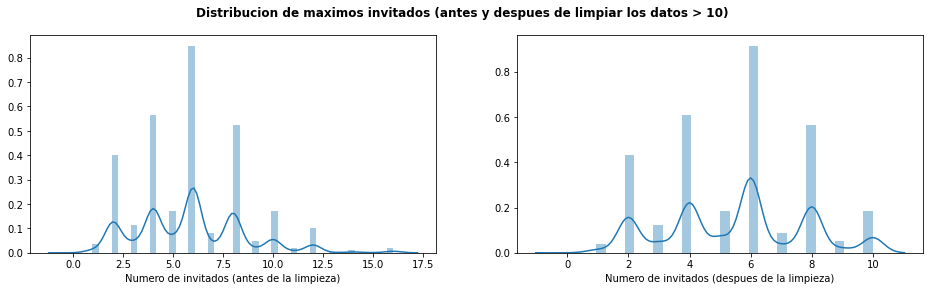

In [13]:
#Distribucion de accommodates
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribucion de maximos invitados (antes y despues de limpiar los datos > 10)', weight='bold', fontsize=12)

# Before cleaning
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Numero de invitados (antes de la limpieza)'), ax=axs[0])

accommodates_10 = df[df['accommodates'] > 10]
rows_to_drop = accommodates_10.index
print("You dropped {} rows.".format(accommodates_10.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['accommodates'].dropna()
sns.distplot(pd.Series(x_axis, name='Numero de invitados (despues de la limpieza)'), ax=axs[1])

De esta manera eliminamos 875 columnas

Hacemos lo mismo con los precios, eliminando aquellas cuyo precio sea mayor de 1000 euros

You dropped 0 rows.
Dataset has 16733 rows, 9 columns.


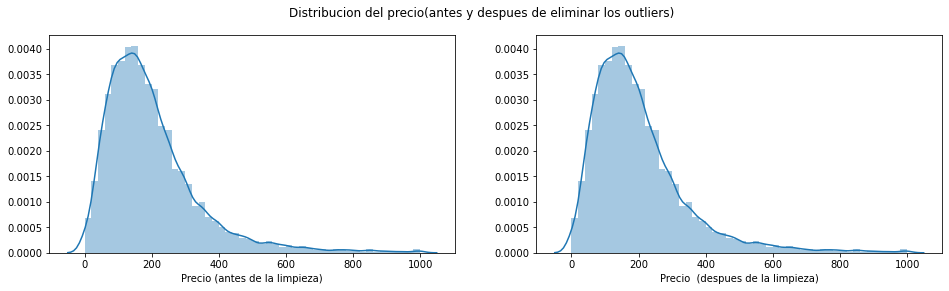

In [14]:
#Distribution of price
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribucion del precio(antes y despues de eliminar los outliers)')

# Before cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Precio (antes de la limpieza)'), ax=axs[0])
                                                                       
# Remove where price > 1500
condicion = df[df['price'] > 1000]
rows_to_drop = condicion.index
print("You dropped {} rows.".format(condicion.shape[0]))
df = df.drop(rows_to_drop, axis=0)
print("Dataset has {} rows, {} columns.".format(*df.shape))

#After cleaning
x_axis=df['price'].dropna()
sns.distplot(pd.Series(x_axis, name='Precio  (despues de la limpieza)'), ax=axs[1])  

Las correlaciones de las variables elegidas son las siguientes:

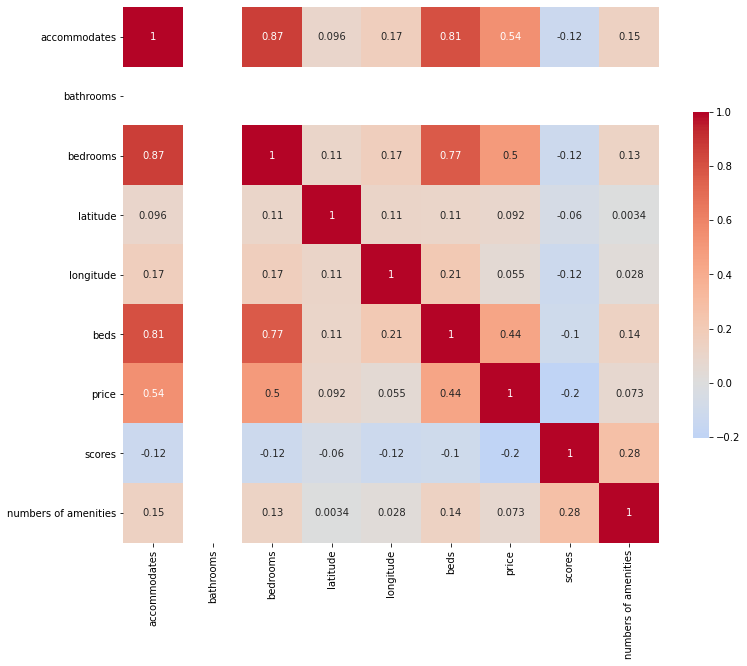

In [15]:
# Computa la matriz de correlación
corr = df.corr()

# Crea una figura de tamaño 12, 12
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .5}, annot=True, ax=ax)

Observamos que podemos eliminar la columna bathrooms ya que no tiene ninguna información

In [16]:
del df['bathrooms']

Correlaciones > 0.5:

['accommodates' 'bedrooms' 'beds' 'price']


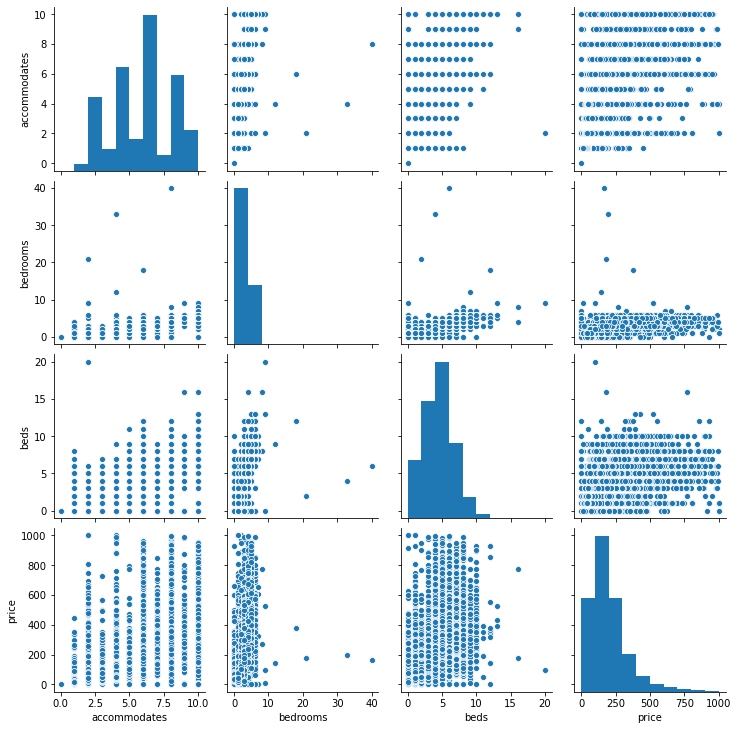

In [17]:
## Filtra sobre `corr` aquellos valores que tengan un valor absoluto > 0.5 y < 1
highly_corr = corr[(np.abs(corr) > 0.5) & (np.abs(corr) < 1)]

## Haz un `melt` sobre highly corr y elimina los valores nulos

highly_corr_melt = highly_corr.melt().dropna()

## Quedate con los valores unicos de la columna variable

list_highly_corr_variables = highly_corr_melt['variable'].unique()

print(list_highly_corr_variables)

## Create the pairplot using seaborn

sns.pairplot(data=df[list_highly_corr_variables])

Las caracterisitcas accommodates,price, bedrooms y beds son las que tienen una correlación mas alta

In [18]:
df

,accommodates,bedrooms,latitude,longitude,beds,price,scores,numbers of amenities
id,,,,,,,,
11547,2,1.0,39.51888,2.48182,1.0,89.0,9.650,38
100831,8,4.0,39.76347,3.16255,7.0,175.0,10.000,36
105891,6,3.0,39.66044,3.07165,4.0,140.0,9.675,66
106833,4,2.0,39.61600,3.30121,4.0,200.0,9.450,16
130669,2,1.0,39.56478,2.60333,2.0,110.0,0.000,8
...,...,...,...,...,...,...,...,...
45489412,6,3.0,39.76505,3.12689,4.0,195.0,0.000,57
45489550,9,5.0,39.89835,3.03647,8.0,110.0,0.000,23
45493152,6,3.0,39.75437,2.90504,4.0,179.0,0.000,43


## 2. Prueba simple de modelos

Dividimos los datos en X e y

In [19]:
X = df.drop('price', axis=1)
y = df['price']

Para la creación de los datos train y test se utiliza la funcion de scikit train_test_split. El 80% de los datos son utilizados para el train y 20% para el test

In [20]:
from sklearn.model_selection import train_test_split
#80% train, 20% test
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

Representación de Xtrain,Xtest,ytrain e ytest de forma bidimensional utilizando las variables accommodates y price

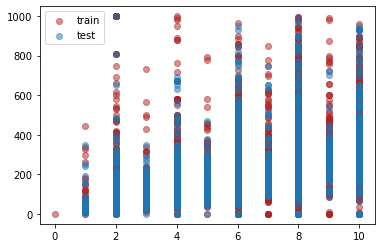

In [21]:
plt.scatter(X_train['accommodates'], y_train, label='train', c='firebrick', alpha=0.5)
plt.scatter(X_test['accommodates'], y_test, label='test', alpha=0.5)
plt.legend()

Comprobamos las distribuciones de X e y para train y test

In [22]:
## Comprueba las distribuciones de X e y para train y test

print(X_train.mean(), X_test.mean())
print(X_train.std(), X_test.std())

print(y_train.mean(), y_test.mean())
print(y_train.std(), y_test.std())

accommodates             5.498282
bedrooms                 2.727252
latitude                39.658912
longitude                2.994691
beds                     4.035335
scores                   5.881087
numbers of amenities    41.713656
dtype: float64 accommodates             5.533015
bedrooms                 2.744846
latitude                39.658561
longitude                2.995349
beds                     4.082761
scores                   5.881670
numbers of amenities    41.540185
dtype: float64
accommodates             2.269027
bedrooms                 1.313053
latitude                 0.165563
longitude                0.246697
beds                     2.085191
scores                   4.563529
numbers of amenities    20.184919
dtype: float64 accommodates             2.333717
bedrooms                 1.323395
latitude                 0.168872
longitude                0.241482
beds                     2.125618
scores                   4.565738
numbers of amenities    20.235489
dty

##### Probando modelos: Regresion lineal y decision tree

In [23]:
#mirar si hay valores nulos
y.isnull().values.any()

False

Creamos los modelos iniciales y les hacemos fit a los datos train

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
reg_DT = DecisionTreeRegressor(random_state=42)
reg_LR = LinearRegression()

reg_DT.fit(X_train, y_train)
reg_LR.fit(X_train, y_train)

LinearRegression()

Al ser regresión, buscamos el model accurancy a traves de la metrica del error cuadratico medio, RMSE.

In [25]:
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Hacemos la predicción para los datos test de los dos modelos

In [26]:
y_DT = reg_DT.predict(X_test)
y_LR = reg_LR.predict(X_test)

Vemos los errores

In [27]:
error_DT = RMSE(y_test, y_DT)
error_LR = RMSE(y_test,y_LR)

print('In sample error for DT: {e} miles de $'.format(e=round(error_DT, 2)))
print('In sample error for LR: {e} miles de $'.format(e= round(error_LR, 2)))
print('Error medio DT: {e}  de $'.format(e=round((error_DT/len(X_test))*1000, 2)))
print('Error medio LR: {e}  de $'.format(e=round((error_LR/len(X_test))*1000, 2)))

In sample error for DT: 156.28 miles de $
In sample error for LR: 118.04 miles de $
Error medio DT: 46.69  de $
Error medio LR: 35.27  de $


A priori, parece que la regresión lineal da mejores resultados que el decission tree

Representamos los resultados enfrentando las y test con las y predecidas de los dos modelos

Text(0, 0.5, 'Valor predecido con regresion lineal')

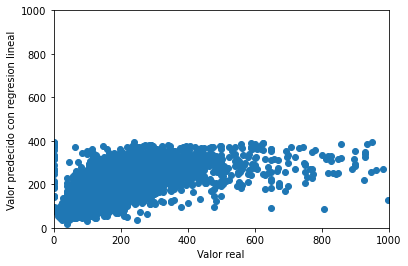

In [28]:
f, ax = plt.subplots()

ax.scatter(y_test, y_LR)
ax.set_xlim([0,1000])
ax.set_ylim([0,1000])
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predecido con regresion lineal')

Text(0, 0.5, 'Valor predecido con decission tree')

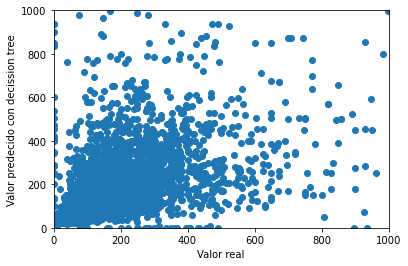

In [29]:
f, ax2 = plt.subplots()

ax2.scatter(y_test, y_DT)
ax2.set_xlim([0,1000])
ax2.set_ylim([0,1000])
ax2.set_xlabel('Valor real')
ax2.set_ylabel('Valor predecido con decission tree')

## 3. Ajuste simple de hiper-parámetros con GridSearch y Validacion Cruzada

Al aplicar decission tree, se puede jugar con tanto con su profundidad como con su número de hojas.
Comparamos gráficamente como evoluciona el RMSE en función de la profundidad del arbol.

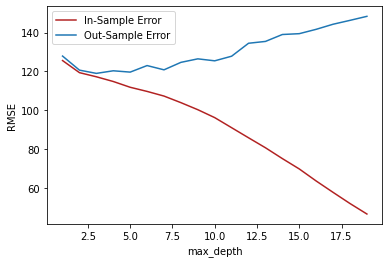

In [30]:
max_depths = range(1, 20)
in_sample_errors = []
out_sample_errors = []
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    in_sample_errors.append(RMSE(y_train, y_pred_train))
    out_sample_errors.append(RMSE(y_test, y_pred_test))

plt.plot(max_depths, in_sample_errors, c='firebrick', label='In-Sample Error')
plt.plot(max_depths, out_sample_errors, label='Out-Sample Error')

plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(loc='best')

Observamos como al aumentar la profundidad del arbol no se reduce en las predicciones de testeo el error.

A continuación implementamos la validacion cruzada para observar los errores de prediccion. Se utiliza un cv = 10

In [31]:
#calcular RMSE medio en Decission Tree con cv = 10

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

DT_scores = cross_val_score(estimator=DecisionTreeRegressor(), X=X.values, y=y, cv=10, scoring=rmse_scorer)

print('RMSE for DT: {m} +- {s}'.format(m=-round(DT_scores.mean(), 2),
                                       s=round(DT_scores.std(),2)))

RMSE for DT: 156.32 +- 9.81


In [32]:
#calcular RMSE medio en regresion con cv = 10
LR_scores = cross_val_score(estimator=LinearRegression(), X=X.values, y=y, cv=10, scoring=rmse_scorer)

print('RMSE for LR: {m} +- {s}'.format(m=-round(LR_scores.mean(), 2),
                                       s=round(LR_scores.std(),2)))

RMSE for LR: 116.67 +- 11.63


Se reducen levemente los de los modelos iniciales, pero no significativamente

No obstante, a continuación graficamos la evolucion del MSE

Text(0, 0.5, 'RMSE')

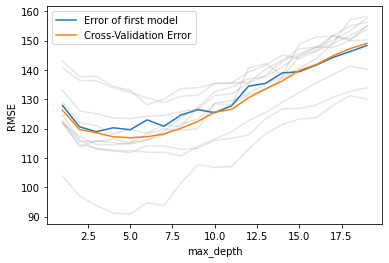

In [33]:
# inicializa una lista vacia
cv_test_errors_mean = []
cv_test_errors_list = []

#itera sobre la lista de max_depths del ejercicio 12
for max_depth in max_depths:
    # Instancia el arbol
    tree = DecisionTreeRegressor(max_depth=max_depth)
    
    # calcula el error usando cross_val_score y todo el set de datos.
    # Recuerda en negar el resultado
    cv_test_error = -cross_val_score(tree, X=X.values, y=y,
                                                     cv=10, scoring=rmse_scorer)
    #calcula el valor medio y haz un append a la lista
    cv_test_errors_mean.append(cv_test_error.mean())
    
    # haz un append a la lista con todo el array de errores
    cv_test_errors_list.append(cv_test_error)

plt.plot(max_depths, out_sample_errors, label='Error of first model')
plt.plot(max_depths, cv_test_errors_mean, label='Cross-Validation Error')
plt.legend(loc='best')
errors = pd.DataFrame(cv_test_errors_list)
for e in errors:
    plt.plot(max_depths, errors[e], c='gray', alpha=0.2)
plt.xlabel('max_depth')
plt.ylabel('RMSE')

Para mejorar la predicción del modelo, se utiliza Grid Search. De esta forma podemos ajustar los hiper-parametros del modelo y buscar los valores con mejor rendimiento, en este caso la mejor profundidad del arbol y sus hojas

In [34]:
#cross validation con cv = 10

from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10),'min_samples_leaf': [2, 5, 10, 15]}

reg = DecisionTreeRegressor()

gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=10,
                         scoring=rmse_scorer)

gs_reg_DT.fit(X = X.values, y = y)
print(gs_reg_DT.best_params_)

{'max_depth': 5, 'min_samples_leaf': 10}


In [35]:
reg2_DT = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10)
reg2_DT.fit(X_train, y_train)
y2_DT = reg2_DT.predict(X_test)

In [36]:
error2_DT = RMSE(y_test, y2_DT)

print('El error del DT es: {e} miles de $'.format(e=round(error2_DT, 2)))
print('Error medio DT: {e}  de $'.format(e=round((error2_DT/len(X_test))*1000, 2)))


El error del DT es: 117.29 miles de $
Error medio DT: 35.04  de $


De esta forma, el error disminuye en gran cantidad

Text(0, 0.5, 'Valor predecido')

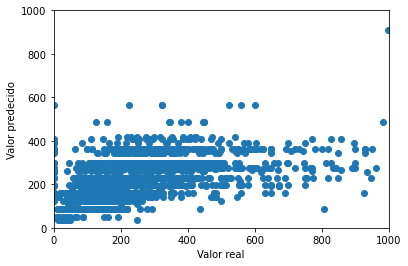

In [37]:
f, ax3 = plt.subplots()

ax3.scatter(y_test, y2_DT)
ax3.set_xlim([0,1000])
ax3.set_ylim([0,1000])
ax3.set_xlabel('Valor real')
ax3.set_ylabel('Valor predecido')

## 4. Implementación de pipelines

Primero solo implementamos transformaciones, en este caso imputacion de nulos y normalizacion

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, shuffle=True)

## Definimos los pasos del pipeline como tuplas (name, Transformer)
imputation_step = ('imputer', SimpleImputer(strategy='mean'))
scaling_step = ('scaler', StandardScaler())

## Los ordenamos en una lista
steps = [imputation_step, scaling_step]

## Finalmente llamamos al creador de pipeline
pipe = Pipeline(steps)

X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

print('X_train: \n')
print('Mean before pipeline: \n', X_train.mean())
print('Mean after pipeline: \n', X_train_transformed.mean(axis=0))

print('\n X_test: \n')
print('Mean before pipeline: \n', X_test.mean())
print('Mean after pipeline: \n', X_test_transformed.mean(axis=0))

X_train: 

Mean before pipeline: 
 accommodates             5.498617
bedrooms                 2.731157
latitude                39.658111
longitude                2.994516
beds                     4.044777
scores                   5.862878
numbers of amenities    41.852466
dtype: float64
Mean after pipeline: 
 [ 4.43653479e-18  1.40701532e-16  1.93946287e-14 -1.74553877e-15
 -9.25334399e-17  1.86017566e-16 -1.64785578e-16]

 X_test: 

Mean before pipeline: 
 accommodates             5.518653
bedrooms                 2.729989
latitude                39.660326
longitude                2.995444
beds                     4.044911
scores                   5.918408
numbers of amenities    41.326693
dtype: float64
Mean after pipeline: 
 [ 8.75816717e-03 -8.66206277e-04  1.33166840e-02  3.78069880e-03
  6.41246122e-05  1.21601330e-02 -2.60493422e-02]


PRUEBA

In [59]:
## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, shuffle=True)

###########################################
## Transformation 1: Polynomial Features ##
###########################################

from sklearn.preprocessing import PolynomialFeatures

#instantiate polynomial features
step_poly = ('poly', PolynomialFeatures())

#######################################
## Transformation 2: feature scaling ##
#######################################

from sklearn.preprocessing import StandardScaler

step_scaler = ('scaler', StandardScaler())

###########################
## Transformation 3: PCA ##
###########################

from sklearn.decomposition import PCA

step_pca = ('pca', PCA())


###########################
## Transformation 4: Imputation mean ##
###########################
step_imputation = ('imputer', SimpleImputer(strategy='mean'))
##################
## Modelization using Random Forest##
##################
from sklearn.ensemble import RandomForestRegressor
regressor_step = ('model', RandomForestRegressor())

### Compose full pipe: RandomForest over data_prep_pipe

pipe_steps = [step_poly, step_scaler,step_imputation, regressor_step]
pipe = Pipeline(pipe_steps)

## train all pipeline from raw data
pipe.fit(X_train, y_train)

## predict from raw data. Pipeline will be in charge of transformations
y_predict = pipe.predict(X_test)

error_RF = RMSE(y_test, y_predict)

print('Error for RF: {e} miles de $'.format(e=round(error_RF, 2)))
print('Error medio RF: {e}  de $'.format(e=round((error_RF/len(X_test))*1000, 2)))

Error for RF: 110.22 miles de $
Error medio RF: 19.96  de $


Text(0, 0.5, 'Valor predecido')

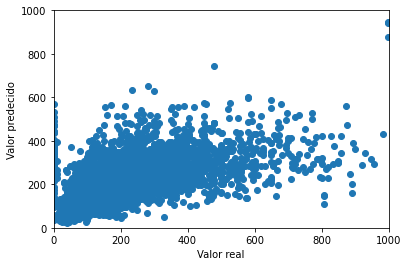

In [60]:
f, ax4 = plt.subplots()

ax4.scatter(y_test, y_predict)
ax4.set_xlim([0,1000])
ax4.set_ylim([0,1000])
ax4.set_xlabel('Valor real')
ax4.set_ylabel('Valor predecido')

Buscando mejores hiperparametros para el random forest regressor

In [50]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            }
rf = RandomForestRegressor()
coef_rf = GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         cv=10,
                         scoring=rmse_scorer)

coef_rf.fit(X = X.values, y = y)
print(coef_rf.best_params_)


{'max_features': 'sqrt', 'n_estimators': 30}


#### PIPELINES CON RANDOM FOREST

In [71]:
## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, shuffle=True)

###########################################
## Transformation 1: Polynomial Features ##
###########################################

from sklearn.preprocessing import PolynomialFeatures

#instantiate polynomial features
step_poly = ('poly', PolynomialFeatures())

#######################################
## Transformation 2: feature scaling ##
#######################################

from sklearn.preprocessing import StandardScaler

step_scaler = ('scaler', StandardScaler())

###########################
## Transformation 3: PCA ##
###########################

from sklearn.decomposition import PCA

step_pca = ('pca', PCA())


###########################
## Transformation 4: Imputation mean ##
###########################
step_imputation = ('imputer', SimpleImputer(strategy='mean'))
##################
## Modelization using Random Forest##
##################
from sklearn.ensemble import RandomForestRegressor
regressor_step = ('model', RandomForestRegressor(max_features = 'sqrt',n_estimators = 30))

### Compose full pipe: RandomForest over data_prep_pipe

pipe_steps = [step_poly, step_scaler,step_imputation, regressor_step]
pipe = Pipeline(pipe_steps)

## train all pipeline from raw data
pipe.fit(X_train, y_train)

## predict from raw data. Pipeline will be in charge of transformations
y_predict = pipe.predict(X_test)

error_RF = RMSE(y_test, y_predict)

print('Error for RF: {e} miles de $'.format(e=round(error_RF, 2)))
print('Error medio RF: {e}  de $'.format(e=round((error_RF/len(X_test))*1000, 2)))


Error for RF: 110.78 miles de $
Error medio RF: 20.06  de $


Text(0, 0.5, 'Valor predicho')

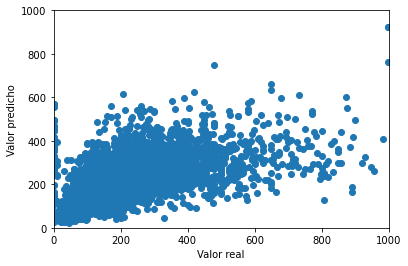

In [72]:
f, ax5 = plt.subplots()

ax5.scatter(y_test, y_predict)
ax5.set_xlim([0,1000])
ax5.set_ylim([0,1000])
ax5.set_xlabel('Valor real')
ax5.set_ylabel('Valor predicho')

#### PIPELINES CON REGRESIÓN LINEAL

In [66]:
## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, shuffle=True)

###########################################
## Transformation 1: Polynomial Features ##
###########################################

from sklearn.preprocessing import PolynomialFeatures

#instantiate polynomial features
step_poly = ('poly', PolynomialFeatures())

#######################################
## Transformation 2: feature scaling ##
#######################################

from sklearn.preprocessing import StandardScaler

step_scaler = ('scaler', StandardScaler())

###########################
## Transformation 3: PCA ##
###########################

from sklearn.decomposition import PCA

step_pca = ('pca', PCA())


###########################
## Transformation 4: Imputation mean ##
###########################
step_imputation = ('imputer', SimpleImputer(strategy='mean'))
##################
## Modelization using Random Forest##
##################
from sklearn.linear_model import LinearRegression
regressor_step = ('model', LinearRegression())

### Compose full pipe: RandomForest over data_prep_pipe

pipe_steps = [step_poly, step_scaler,step_imputation, regressor_step]
pipe = Pipeline(pipe_steps)

## train all pipeline from raw data
pipe.fit(X_train, y_train)

## predict from raw data. Pipeline will be in charge of transformations
y_predict = pipe.predict(X_test)

error_LiRe = RMSE(y_test, y_predict)

print('Error for LR: {e} miles de $'.format(e=round(error_LiRe, 2)))
print('Error medio LR: {e}  de $'.format(e=round((error_LiRe/len(X_test))*1000, 2)))

Error for LR: 113.24 miles de $
Error medio LR: 20.51  de $


Text(0, 0.5, 'Valor predicho')

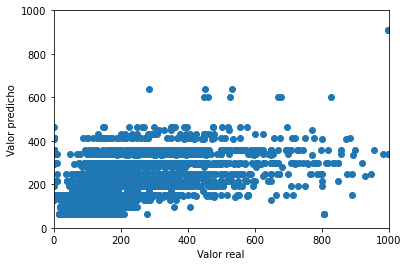

In [70]:
f, ax6 = plt.subplots()

ax6.scatter(y_test, y_predict)
ax6.set_xlim([0,1000])
ax6.set_ylim([0,1000])
ax6.set_xlabel('Valor real')
ax6.set_ylabel('Valor predicho')

#### PIPELINES CON DECISION TREE

In [68]:
## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, shuffle=True)

###########################################
## Transformation 1: Polynomial Features ##
###########################################

from sklearn.preprocessing import PolynomialFeatures

#instantiate polynomial features
step_poly = ('poly', PolynomialFeatures())

#######################################
## Transformation 2: feature scaling ##
#######################################

from sklearn.preprocessing import StandardScaler

step_scaler = ('scaler', StandardScaler())

###########################
## Transformation 3: PCA ##
###########################

from sklearn.decomposition import PCA

step_pca = ('pca', PCA())


###########################
## Transformation 4: Imputation mean ##
###########################
step_imputation = ('imputer', SimpleImputer(strategy='mean'))
##################
## Modelization using Random Forest##
##################
from sklearn.tree import DecisionTreeRegressor
regressor_step = ('model', DecisionTreeRegressor(max_depth=5,min_samples_leaf=10))

### Compose full pipe: RandomForest over data_prep_pipe

pipe_steps = [step_poly, step_scaler,step_imputation, regressor_step]
pipe = Pipeline(pipe_steps)

## train all pipeline from raw data
pipe.fit(X_train, y_train)

## predict from raw data. Pipeline will be in charge of transformations
y_predict = pipe.predict(X_test)

error_DeTr = RMSE(y_test, y_predict)

print('Error for DT: {e} miles de $'.format(e=round(error_DeTr, 2)))
print('Error medio LR: {e}  de $'.format(e=round((error_DeTr/len(X_test))*1000, 2)))

Error for DT: 114.18 miles de $
Error medio LR: 20.68  de $


Text(0, 0.5, 'Valor predecido')

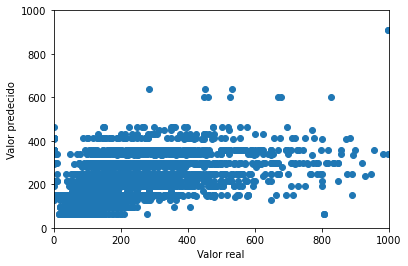

In [69]:
f, ax7 = plt.subplots()

ax7.scatter(y_test, y_predict)
ax7.set_xlim([0,1000])
ax7.set_ylim([0,1000])
ax7.set_xlabel('Valor real')
ax7.set_ylabel('Valor predecido')

In [77]:
print('Los errores con los distintos tipos de modelos optimizados son los siguientes: \n')
print('Error del modelo RF: {e} miles de $'.format(e=round(error_RF, 2)))
print('Error medio RF: {e}  de $'.format(e=round((error_RF/len(X_test))*1000, 2)))
print('Error del modelo LR: {e} miles de $'.format(e=round(error_LiRe, 2)))
print('Error medio LR: {e}  de $'.format(e=round((error_LiRe/len(X_test))*1000, 2)))
print('Error del modelo DT: {e} miles de $'.format(e=round(error_DeTr, 2)))
print('Error medio LR: {e}  de $'.format(e=round((error_DeTr/len(X_test))*1000, 2)))

Los errores con los distintos tipos de modelos optimizados son los siguientes: 

Error del modelo RF: 110.78 miles de $
Error medio RF: 20.06  de $
Error del modelo LR: 113.24 miles de $
Error medio LR: 20.51  de $
Error del modelo DT: 114.18 miles de $
Error medio LR: 20.68  de $


## 5. Conclusiones y trabajo futuro

La predicción del valor de viviendas no es una tarea fácil ya que su precio depende de muchas variables. No obstante, se ha conseguido realizar una predicción bastante precisa con un error medio de 20 euros.
Llama la atención como en el caso de implementar los algoritmos de decission trees y regresion lineal, al optimizar sus hiper-parametros se ha disminuido su error inicial a la mitad. También es interesante como finalmente los 3 modelos, donde por ejemplo la regresión lineal es mucho mas simple que los demas modelos, dan errores muy parecidos.

Por otro lado, y más en la isla de Mallorca donde existen lugares tan espectaculares y paradisiacos tanto en el entorno costero como montañoso, la localización de la vivienda juzga un papel fundamental en su precio. Es por esto que en líneas futuras se podría evaluar la ubicación de cada vivienda a partir de los datos de longitud y latitud y crear una medida del 0 al 10 para valorarla y conseguir minimizar el error de prediccion. 